In [1]:
import pandas as pd
import MeCab
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
def mecab_sep(text):
	m = MeCab.Tagger("-Ochasen")
	node = m.parseToNode(text)
	words_list = []
	while node:
		if node.feature.split(",")[0] in ["名詞"]:
			words_list.append(node.surface)
		node = node.next
	return words_list

### Bag-of-words / tf-idf
def calc_vecs(docs):
	vectorizer = TfidfVectorizer(analyzer=mecab_sep)
	vecs = vectorizer.fit_transform(docs)
	return vecs.toarray()

In [4]:
target_docs_df = pd.read_csv("R1R2R3R4.csv",encoding='UTF-8')
target_docs = target_docs_df["題目"].tolist()
all_docs_vecs = calc_vecs(target_docs_df["題目"])

vec = KMeans(n_clusters=16)
vec.fit(all_docs_vecs)

vec.labels_

array([ 7, 15,  6,  8,  0,  3,  9,  3,  4,  3, 13,  6, 13, 11, 15, 11,  3,
       15,  3, 15,  2, 13,  3, 13,  0,  3, 15,  5,  7,  3,  5, 13, 12,  2,
       15,  1,  2,  9, 11,  3,  2,  0,  3,  0,  0,  9,  3,  0, 10,  3, 13,
        4,  9,  9,  3, 15,  4, 15,  4, 11,  3, 15,  1,  7, 13,  0,  9,  5,
        3, 11,  3,  5, 12, 11, 13,  3, 11,  3,  6,  3, 15,  9, 12,  3,  3,
        6, 11, 11,  3,  1,  2,  3, 10, 10,  2,  2,  6,  3,  3,  9, 14,  4,
        3,  8,  9,  3,  0,  9,  9, 15,  1,  1, 11, 10, 11, 15, 15,  3, 15,
        3, 15,  3,  8,  9,  4,  3, 15,  4,  5,  6, 13,  4,  4,  3, 12, 14,
        0,  3, 10,  3,  6,  1,  6,  0,  9,  8,  0,  3,  4,  6, 11,  8,  3,
       15,  0,  5,  3,  4, 15,  3,  5,  3,  8,  2,  8,  1,  9, 10, 11,  8,
       11,  9,  4, 13,  3,  1,  9, 13,  8, 11,  8, 12,  4, 15,  6,  2,  3,
       11,  1,  9,  7,  3,  5,  3,  2,  1,  1, 13, 11,  7,  3,  9,  0,  7,
       10, 15,  5,  9,  3, 10,  9,  2, 15, 11, 15,  3, 15,  9, 12,  4, 12,
        2, 15,  9,  9,  3

In [5]:
target_docs_df ["クラス"] = vec.labels_

pd.crosstab(target_docs_df["研究室"],target_docs_df["クラス"])

cross_survive= pd.crosstab(target_docs_df['クラス'], target_docs_df['研究室'], 
normalize='index')

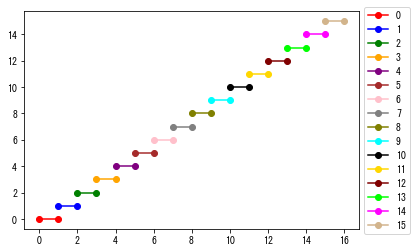

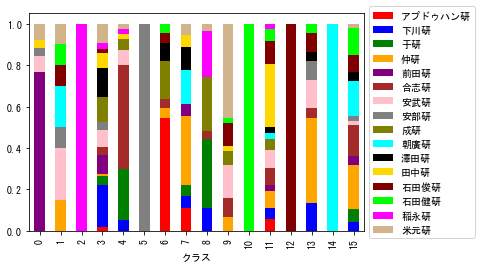

In [7]:
#文字化け
plt.rcParams["font.family"] = "MS Gothic"

#plt.legend(loc = "best")

#カラー食
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", ["red", "blue", "green", 
"orange", "purple", "brown", "pink", "gray", "olive", "cyan", "black", "gold", "maroon", 
"lime", "fuchsia", "tan"])
n = 16
for i in range(n):
	x = (i, i+1)
	y = (i, i)
	plt.plot(x, y, "o-", label=i)

plt.legend( loc='center left', bbox_to_anchor=(1., .5))
#plt.legend()

cross_survive.plot.bar(stacked=True)
#plot_colortable(mcolors.CSS4_COLORS)
plt.legend( loc='center left', bbox_to_anchor=(1., .5))
#plt.xticks(rotation=45)